<a href="https://colab.research.google.com/github/sharonma1218/stats306/blob/main/homeworks/hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")
install.packages("tidytext")
remotes::install_github("bradleyboehmke/harrypotter")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'harrypotter' from a github remote, the SHA1 (51f71461) has not changed since last install.
  Use `force = TRUE` to force installation



In [ ]:
library(tidyverse)
library(stringr)
library(harrypotter)
library(tidytext)

In [ ]:
options(jupyter.rich_display=T)
options(repr.plot.width=4, repr.plot.height=3)

# STATS 306
## Homework 7: Text Analysis

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Sentiment Analysis (4 points)

In problem 1 we will perform *sentiment analysis* of the Harry Potter books. The file `afinn.RData` contains a sentiment score for a large number of words in the English language:

In [ ]:
load(url("https://datasets.stats306.org/afinn.RData"))
head(afinn)

word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2


Negatively connoted words receive low scores, while positively connoted words receive high scores:

In [ ]:
filter(afinn, word %in% c("death", "hurrah"))

word,value
<chr>,<dbl>
death,-2
hurrah,5


The `tidytext::unnest_tokens()` function can be used to break a chunk of text into "tokens" (words, sentences, etc.) It works as follows. Consider the following tibble, which contains all 17 chapters of the first book in the Harry Potter series:

In [ ]:
phil_tbl <- tibble(chapter=seq_along(philosophers_stone), 
                   text=philosophers_stone) %>% print

# A tibble: 17 × 2
   chapter text                                                                 
     <int> <chr>                                                                
 1       1 "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet D…
 2       2 "THE VANISHING GLASS　　Nearly ten years had passed since the Dursle…
 3       3 "THE LETTERS FROM NO ONE　　The escape of the Brazilian boa constric…
 4       4 "THE KEEPER OF THE KEYS　　BOOM. They knocked again. Dudley jerked a…
 5       5 "DIAGON ALLEY　　Harry woke early the next morning. Although he coul…
 6       6 "THE JOURNEY FROM PLATFORM NINE AND THREE-QUARTERS　　Harry's last m…
 7       7 "THE SORTING HAT　　The door swung open at once. A tall, black-haire…
 8       8 "THE POTIONS MASTER　　There, look.\"　　\"Where?\"　　\"Next to the…
 9       9 "THE MIDNIGHT DUEL　　Harry had never believed he would meet a boy h…
10      10 "HALLOWEEN　　Malfoy couldn't believe his eyes when he saw that Harr…
11      11 "QUIDDITCH　　As they en

To perform sentiment analysis, we need to break each chapter into words so that we can join it to the `afinn` table. This is what `unnest_tokens()` does:

In [ ]:
phil_tok <- unnest_tokens(phil_tbl, input=text, output=word) %>% print

# A tibble: 77,875 × 2
   chapter word   
     <int> <chr>  
 1       1 the    
 2       1 boy    
 3       1 who    
 4       1 lived  
 5       1 mr     
 6       1 and    
 7       1 mrs    
 8       1 dursley
 9       1 of     
10       1 number 
# … with 77,865 more rows


**1(a)** By joining this table to other tables containing text data and summarizing, we can generate scores of how positive or negative the text is. Using the table and `afinn`, we can assign sentiment scores to various portions of text. Generate a plot reflecting how the sentiment changes over 17 chapters of the first book in the Harry Potter series. What conclusion can you draw from the plot? (1 point)

Joining with `by = join_by(word)`


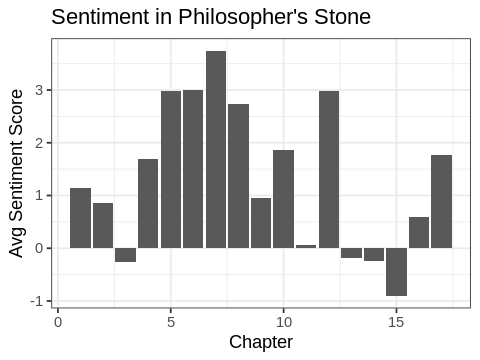

In [ ]:
# Solution: 

phil_tok%>%
  group_by(chapter,word)%>%
  mutate(n=n())%>%
  inner_join(afinn)%>%
  mutate(total_value=n*value)%>%
  group_by(chapter)%>%
  summarize(avg_val_per_chap=mean(total_value))%>%
  ggplot(aes(x=chapter,y=avg_val_per_chap))+
  geom_bar(stat="identity")+
  theme_bw()+
  labs(title="Sentiment in Philosopher's Stone",
        x="Chapter",
        y="Avg Sentiment Score")

# The overall sentiment of the first book in the Harry Potter series is more positive than negative. 
# The negative parts occurred around chapter 3, 11, and 13-15. 
# The latter makes sense b/c that's near the climax/turning point of the plot. 

**1(b)**
Some people say that the Harry Potter books became darker (more negative) over time. Use sentiment analysis to investigate this, and report your conclusion here. (1 point)

**HINT**: A list of all the Harry Potter books can be obtained by looking at the help page for the `harrypotter` package.

Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`


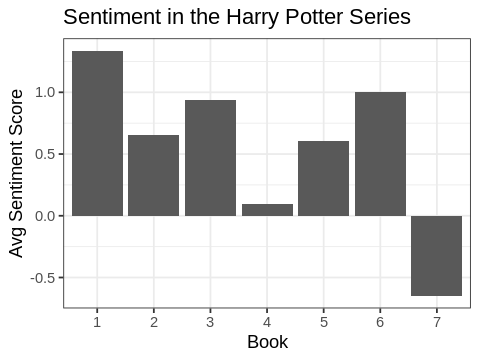

In [ ]:
# Solution: 

# Book 1:
phil_book<-phil_tok%>%
  group_by(chapter,word)%>%
  mutate(n=n())%>%
  inner_join(afinn)%>%
  mutate(total_value=n*value)%>%
  group_by(chapter)%>%
  summarize(avg_val_per_chap=mean(total_value))%>%
  mutate(book="1")

# Book 2:
cham_tbl <- tibble(chapter=seq_along(chamber_of_secrets), 
                   text=chamber_of_secrets)
cham_tok <- unnest_tokens(cham_tbl, input=text, output=word)
cham_book<-cham_tok%>%
  group_by(chapter,word)%>%
  mutate(n=n())%>%
  inner_join(afinn)%>%
  mutate(total_value=n*value)%>%
  group_by(chapter)%>%
  summarize(avg_val_per_chap=mean(total_value))%>%
  mutate(book="2")

# Book 3:
prison_tbl <- tibble(chapter=seq_along(prisoner_of_azkaban), 
                   text=prisoner_of_azkaban)
prison_tok <- unnest_tokens(prison_tbl, input=text, output=word)
prison_book<-prison_tok%>%
  group_by(chapter,word)%>%
  mutate(n=n())%>%
  inner_join(afinn)%>%
  mutate(total_value=n*value)%>%
  group_by(chapter)%>%
  summarize(avg_val_per_chap=mean(total_value))%>%
  mutate(book="3")

# Book 4:
gob_tbl <- tibble(chapter=seq_along(goblet_of_fire), 
                   text=goblet_of_fire)
gob_tok <- unnest_tokens(gob_tbl, input=text, output=word)
gob_book<-gob_tok%>%
  group_by(chapter,word)%>%
  mutate(n=n())%>%
  inner_join(afinn)%>%
  mutate(total_value=n*value)%>%
  group_by(chapter)%>%
  summarize(avg_val_per_chap=mean(total_value))%>%
  mutate(book="4")

# Book 5:
order_tbl <- tibble(chapter=seq_along(order_of_the_phoenix), 
                   text=order_of_the_phoenix)
order_tok <- unnest_tokens(order_tbl, input=text, output=word)
order_book<-order_tok%>%
  group_by(chapter,word)%>%
  mutate(n=n())%>%
  inner_join(afinn)%>%
  mutate(total_value=n*value)%>%
  group_by(chapter)%>%
  summarize(avg_val_per_chap=mean(total_value))%>%
  mutate(book="5")

# Book 6:
half_tbl <- tibble(chapter=seq_along(half_blood_prince), 
                   text=half_blood_prince)
half_tok <- unnest_tokens(half_tbl, input=text, output=word)
half_book<-half_tok%>%
  group_by(chapter,word)%>%
  mutate(n=n())%>%
  inner_join(afinn)%>%
  mutate(total_value=n*value)%>%
  group_by(chapter)%>%
  summarize(avg_val_per_chap=mean(total_value))%>%
  mutate(book="6")

# Book 7:
death_tbl <- tibble(chapter=seq_along(deathly_hallows), 
                   text=deathly_hallows)
death_tok <- unnest_tokens(death_tbl, input=text, output=word)
death_book<-death_tok%>%
  group_by(chapter,word)%>%
  mutate(n=n())%>%
  inner_join(afinn)%>%
  mutate(total_value=n*value)%>%
  group_by(chapter)%>%
  summarize(avg_val_per_chap=mean(total_value))%>%
  mutate(book="7")

# Combine Tables: 
all_books<-rbind(phil_book,cham_book)%>%
  rbind(prison_book)%>%
  rbind(gob_book)%>%
  rbind(order_book)%>%
  rbind(half_book)%>%
  rbind(death_book)

# Plot: 
all_books%>%
  select(book,avg_val_per_chap)%>%
  group_by(book)%>%
  summarize(avg_val_per_book=mean(avg_val_per_chap))%>%
  ggplot(aes(x=book,y=avg_val_per_book))+
  geom_bar(stat="identity")+
  theme_bw()+
  labs(title="Sentiment in the Harry Potter Series",
        x="Book",
        y="Avg Sentiment Score")

# I agree that the Harry Potter series became darker over time b/c the first book was the happiest,
# the last book was the darkest, and there is an obvious decrease, although non-linear, b/w those two points. 

**1(c)** According to the sentiment scores, what are the most negative and positive chapters in any of the Harry Potter books? (1 point)

In [ ]:
# Solution: 

# The most positive chapter was Chapter 5 of the Half Blood Prince:
all_books%>%
  group_by(book,chapter)%>%
  arrange(desc(avg_val_per_chap))%>%
  head

# The most negative chapter was Chapter 35 of the Order of the Phoenix:
all_books%>%
  group_by(book,chapter)%>%
  arrange(avg_val_per_chap)%>%
  head

chapter,avg_val_per_chap,book
<int>,<dbl>,<chr>
5,6.541284,6
15,5.689855,6
7,5.398104,4
6,4.961078,3
15,4.870968,5
9,4.790850,6


chapter,avg_val_per_chap,book
<int>,<dbl>,<chr>
35,-20.544828,5
25,-9.452703,4
35,-8.250000,4
28,-7.024631,6
34,-6.383234,4
4,-6.166667,7


**1(d)** Of the sentences that contain three or more scored words, what is the happiest (most positive)? (1 points)

In [ ]:
# Solution: 

# Combined Tables: 
phil_tbl <- tibble(chapter=seq_along(philosophers_stone), 
                   text=philosophers_stone) %>% mutate(book=1)
cham_tbl <- tibble(chapter=seq_along(chamber_of_secrets), 
                   text=chamber_of_secrets) %>% mutate(book=2)
prison_tbl <- tibble(chapter=seq_along(prisoner_of_azkaban), 
                   text=prisoner_of_azkaban) %>% mutate(book=3)
gob_tbl <- tibble(chapter=seq_along(goblet_of_fire), 
                   text=goblet_of_fire) %>% mutate(book=4)
order_tbl <- tibble(chapter=seq_along(order_of_the_phoenix), 
                   text=order_of_the_phoenix) %>% mutate(book=5)
half_tbl <- tibble(chapter=seq_along(half_blood_prince), 
                   text=half_blood_prince) %>% mutate(book=6)
death_tbl <- tibble(chapter=seq_along(deathly_hallows), 
                   text=deathly_hallows) %>% mutate(book=7)
all_books<-bind_rows(phil_tbl,cham_tbl,prison_tbl,gob_tbl,order_tbl,half_tbl,death_tbl)

all_books%>%
  unnest_sentences(input=text,output=sentence)%>%
  group_by(book,chapter)%>%
  mutate(sentence_n=row_number())%>%
  ungroup()%>%
  unnest_tokens(input=sentence,output=word)%>%
  inner_join(afinn,by="word")%>%
  group_by(book,chapter,sentence_n)%>%
  summarize(words_n=sum(!is.na(value)),
            val_per_sentence=sum(value,na.rm=T))%>%
  filter(words_n>=3)%>%
  ungroup()%>%
  top_n(1,val_per_sentence)

# The happiest sentence (that contains at least 3 words) is in Chapter 24 of the Order of the Phoenix.

`summarise()` has grouped output by 'book', 'chapter'. You can override using
the `.groups` argument.


book,chapter,sentence_n,words_n,val_per_sentence
<dbl>,<int>,<int>,<int>,<dbl>
5,24,560,5,19


## Problem 2: Reddit dataset (4 points)
The file `reddit_xmas_2017.RData` contains 100,000 comments posted to Reddit on Christmas Day, 2017. Unless specified otherwise, all matches are case insensitive.

In [ ]:
load(url('https://datasets.stats306.org/reddit_xmas_2017.RData'))
reddit %>% print

# A tibble: 100,000 × 3
   author              body                                  created_utc        
   <chr>               <chr>                                 <dttm>             
 1 br_shadow           "Thank you for this, there is a pers… 2017-12-25 15:49:08
 2 Ksalol              "They are not to quick actually. It'… 2017-12-25 17:42:50
 3 itscool83           "tell her you guys should hang out w… 2017-12-25 18:54:13
 4 Glu7enFree          "Autism is a high honor in the tech … 2017-12-25 07:48:17
 5 Theotheogreato      "You thought a cat was your son?! "   2017-12-25 20:58:08
 6 Shadrac121          "Hopfully she takes wat people say i… 2017-12-25 22:27:31
 7 1fzUjhemoSB1QV7zI7  "Si ce propui sa facem cu toata piel… 2017-12-25 07:41:31
 8 MinisterOfEducation "I don't mean to be impolite, but if… 2017-12-25 19:28:35
 9 AabidS10            "i dont have a 720p x265 of it, sorr… 2017-12-25 13:20:32
10 S3RG10              "I'm dying to try Guatemalan sandals… 2017-12-25 00:48:46
# … 

Comment 174 wishes everyone a happy holidays:

In [ ]:
reddit %>% slice(174)

author,body,created_utc
<chr>,<chr>,<dttm>
Bareilles,Thank you. Happy holidays everyone!,2017-12-25 01:33:50


**2(a)**  What are other people wishing? Count the first occurrence of the string "Happy `<word>`" or "Merry `<word>`" in the comment body, if any, count the matches. To keep things interesting, do *not* include phrases matching `(happy|merry) (to|with|for|about|and|that|if|i|you|when)`. 

Print a table containing the top 10 matches; a few of the rows are:

<table>
<thead>
    <tr><th scope="col">greeting</th><th scope="col">n</th></tr>
    <tr><th scope="col">&lt;chr&gt;</th><th scope="col">&lt;int&gt;</th></tr>
</thead>
<tbody>
    <tr><td>merry christmas</td><td>2040</td></tr>
    <tr><td>happy holidays </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td>   7</td></tr>
    <tr><td>happy cakeday  </td><td>   6</td></tr>
</tbody>
</table>

Your numbers may vary slightly depending on how you performed the match.

In [ ]:
# Solution: 
reddit%>%
  mutate(new_body=str_to_lower(body))%>%
  mutate(greeting=str_extract(new_body,"(happy|merry)\\s\\w+"))%>%
  filter(!is.na(greeting))%>%
  group_by(greeting)%>%
  summarize(n=n())%>%
  filter(!str_detect(greeting,"\\s(to|with|for|about|and|that|if|i|you|when)"))%>%
  arrange(desc(n))%>%
  head(10)

greeting,n
<chr>,<int>
merry christmas,2040
happy holidays,477
merry xmas,93
happy christmas,44
happy cake,28
happy birthday,23
happy new,15
happy holiday,13
merry x,7


**2(b)** Find the number of times `christmas`or `xmas` mentioned each hour. Similarly, find the number of mentions per hour of `snow` or `flakes`. Draw a plot comparing these two time series. (1 point)

In [ ]:
library(lubridate)

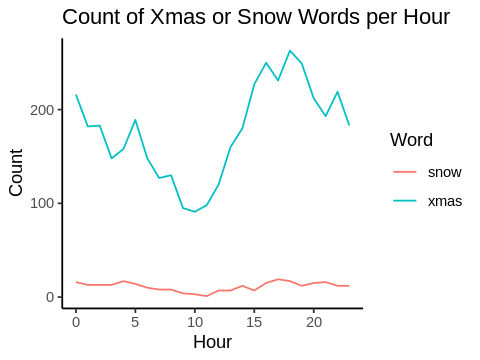

In [ ]:
# Solution:
reddit%>%
  mutate(hour=hour(created_utc))%>%
  mutate(xmas=str_detect(body,regex("christmas|xmas",ignore_case=T)),
          snow=str_detect(body,regex("snow|flakes",ignore_case=T)))%>% # ignore lower/upper case; col does t or f
  group_by(hour)%>% # better to group before summarize
  summarize(xmas=sum(xmas),
            snow=sum(snow))%>%
  pivot_longer(c("xmas","snow"),names_to="word",values_to="count")%>%
  ggplot(aes(x=hour,y=count,color=word))+
  geom_line()+
  labs(title="Count of Xmas or Snow Words per Hour",
        x="Hour",
        y="Count",
        color="Word")+
  theme_classic()

**2(c)** On Christmas Day, the word `christmas` occurs 4264 times. What is the next most common word after Christmas, and how many times does it appear? (1 point)

In [ ]:
# Solution:

reddit%>%
  unnest_tokens(output=word,input=body,token="words")%>%
  group_by(word)%>%
  summarize(n=n())%>%
  arrange(desc(n))%>%
  slice(71:80)

# The next most common word after "christmas" is "only", which appears 4151 times.

word,n
<chr>,<int>
christmas,4259
only,4151
am,4017
then,3992
been,3929
please,3860
also,3823
www.reddit.com,3786
than,3695


**2(d)** Using `afinn` dataset, calculate the average sentiment scores of reddit comments for each hour. When is the most positive time in Christmas Day? (1 point)

In [ ]:
# Solution: 

reddit%>%
  unnest_tokens(output=word,input=body,token="words")%>%
  mutate(hour=hour(created_utc))%>%
  inner_join(afinn)%>%
  group_by(hour)%>%
  summarize(avg_score=mean(value))%>%
  arrange(desc(avg_score))%>%
  head

# The most positive time on Christmas Day was at 4AM UTC.

Joining with `by = join_by(word)`


hour,avg_score
<int>,<dbl>
4,0.9891790
5,0.9697171
21,0.9642078
14,0.9584906
11,0.9511098
19,0.9363501


## Challenge Problem: Text Ranking (2 points)
Not all terms/words are equally important, and some carry more information about contents. But how do we measure the importance? One popular method is using TF-IDF (term frequency–inverse document frequency). TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection. Term Frequency measures the relative frequency of term within document. Inverse Document Frequency measures of how much information the word provides for the collection. 

We defined TF-IDF as:
$$\text{TF-IDF} = \operatorname{TF}(t,d) \times \operatorname{IDF}(t)$$
$$\operatorname{TF}(t, d) = \log(1+c(t,d))$$
$$\operatorname{IDF}(t) = 1 + \log(N/k)$$
where $c(t,d)$ is the frequency count of term $t$ in document $d$, $N$ is the total number of documents in the collection, $k$ is the number
of documents containing term $t$


**(a)** Consider the Harry Potter series as a collection of documents(books), find top 5 words in each book ranked by TF-IDF. Comment on your finding. (1 point) 

_Hint_: You can either compute this by hand, using the definitions shown above, or employ built-in functions in the `tidytext` package.

In [ ]:
# Solution:

# The top 5 words in each book ranked by TF-IDF: 

# Book 1: 
phil_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  arrange(desc(tfidf))%>%
  head(5)

# Book 2: 
cham_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  arrange(desc(tfidf))%>%
  head(5)

# Book 3: 
prison_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  arrange(desc(tfidf))%>%
  head(5)

# Book 4: 
gob_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  arrange(desc(tfidf))%>%
  head(5)

# Book 5:
order_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  arrange(desc(tfidf))%>%
  head(5)

# Book 6: 
half_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  arrange(desc(tfidf))%>%
  head(5)

# Book 7:
death_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  arrange(desc(tfidf))%>%
  head(5)

# Not surprisingly, the most important words in all of the books are stop words,
# such as "the, and, to, a, he, of, a". 

word,n,tfidf
<chr>,<int>,<dbl>
the,3629,8.196988
and,1923,7.562162
to,1861,7.529406
a,1691,7.433667
he,1528,7.332369


word,n,tfidf
<chr>,<int>,<dbl>
the,4086,8.315566
and,2166,7.681099
to,2023,7.612831
a,1805,7.498870
of,1636,7.400621


word,n,tfidf
<chr>,<int>,<dbl>
the,4990,8.515392
and,2619,7.870930
to,2554,7.845808
a,2109,7.654443
of,2029,7.615791


word,n,tfidf
<chr>,<int>,<dbl>
the,9305,9.138415
and,4959,8.509161
to,4801,8.476788
of,3917,8.273337
he,3667,8.207402


word,n,tfidf
<chr>,<int>,<dbl>
the,11740,9.370842
to,6518,8.782476
and,6189,8.730690
of,5332,8.581669
a,4856,8.488176


word,n,tfidf
<chr>,<int>,<dbl>
the,7508,8.923858
to,4296,8.365672
and,4064,8.310169
of,3419,8.137396
he,3319,8.107720


word,n,tfidf
<chr>,<int>,<dbl>
the,10335,9.243388
and,5510,8.614501
to,4932,8.503703
of,4202,8.343554
he,3953,8.282483


**(b)** Stop words are a set of commonly used words in a language like "the", "of", "and", "to", "a". The `stop_words` table contains a list of such words. If you ignore all the words in `stop_words`, what are the top 10 words (again ranked by TF-IDF) in each Harry Potter book? (1 point)

_Hint_: use `anti_join` to exclude words in `stop_words`.

In [ ]:
# Solution: 

# Book 1: 
phil_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  anti_join(stop_words,by="word")%>%
  arrange(desc(n))%>%
  head(10)

# Book 2: 
cham_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  anti_join(stop_words,by="word")%>%
  arrange(desc(n))%>%
  head(10)

# Book 3: 
prison_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  anti_join(stop_words,by="word")%>%
  arrange(desc(n))%>%
  head(10)

# Book 4:
gob_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  anti_join(stop_words,by="word")%>%
  arrange(desc(n))%>%
  head(10)

# Book 5: 
order_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  anti_join(stop_words,by="word")%>%
  arrange(desc(n))%>%
  head(10)

# Book 6: 
half_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  anti_join(stop_words,by="word")%>%
  arrange(desc(n))%>%
  head(10)

# Book 7: 
new_death_tfidf<-death_tok%>%
  group_by(word)%>%
  summarize(n=n())%>%
  mutate(tfidf=(log(1+n))*(1+log(7/7)))%>%
  anti_join(stop_words,by="word")%>%
  arrange(desc(n))%>%
  head(10)

# Not surprisingly, after removing all the stop words, the most important words are the characters, 
# such as Harry, Ron, and Hermoine. 

word,n,tfidf
<chr>,<int>,<dbl>
harry,1213,7.101676
ron,410,6.018593
hagrid,336,5.820083
hermione,257,5.552960
professor,181,5.204007
looked,169,5.135798
snape,145,4.983607
dumbledore,143,4.969813
uncle,121,4.804021


word,n,tfidf
<chr>,<int>,<dbl>
harry,1503,7.315884
ron,650,6.478510
hermione,289,5.669881
malfoy,202,5.313206
lockhart,197,5.288267
professor,190,5.252273
weasley,157,5.062595
looked,155,5.049856
time,148,5.003946


word,n,tfidf
<chr>,<int>,<dbl>
harry,1824,7.509335
ron,690,6.538140
hermione,603,6.403574
professor,395,5.981414
lupin,369,5.913503
black,332,5.808142
looked,235,5.463832
hagrid,206,5.332719
snape,206,5.332719


word,n,tfidf
<chr>,<int>,<dbl>
harry,2936,7.985144
ron,980,6.888572
hermione,826,6.717805
dumbledore,529,6.272877
looked,483,6.182085
weasley,370,5.916202
hagrid,326,5.789960
eyes,316,5.758902
moody,309,5.736572


word,n,tfidf
<chr>,<int>,<dbl>
harry,3730,8.224432
hermione,1220,7.107425
ron,1189,7.081709
sirius,588,6.378426
professor,586,6.375025
dumbledore,568,6.343880
looked,537,6.287859
umbridge,496,6.208590
weasley,434,6.075346


word,n,tfidf
<chr>,<int>,<dbl>
harry,2581,7.856320
dumbledore,873,6.773080
ron,791,6.674561
hermione,640,6.463029
looked,335,5.817111
slughorn,335,5.817111
snape,327,5.793014
malfoy,325,5.786897
time,313,5.749393
